<a href="https://colab.research.google.com/github/Yusrah23/Python_Scripts/blob/master/titianic_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,plot_confusion_matrix,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

In [65]:
# loading dataset

titanic_train_val = pd.read_csv("train.csv")

In [66]:
data = titanic_train_val.copy()

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
# shape

data.shape

(891, 12)

In [69]:
# info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [70]:
# checking for duplicate

data.duplicated().sum()

0

In [71]:
# checking for missing values

data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [72]:
# checking statistical info

data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Statiscal info shows that:

*   More than 75% of the passengers are below 38 years old
*   There are fewer aged passengers




In [73]:
data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


The categorical summary shows that:


*   No duplicates in the names
*   There are duplicates in the cabin and Ticket features
*   72.44% of the passengers used S embarked
*   64.75% of the passengers are males



**EDA**

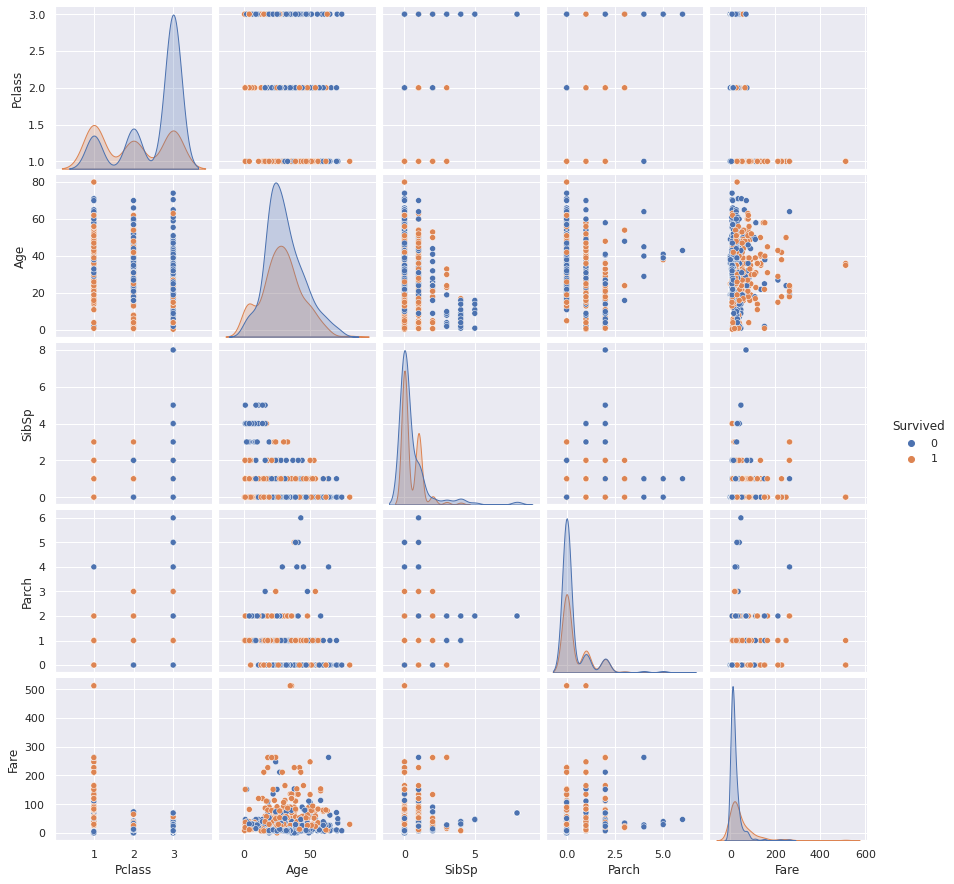

In [74]:
cols_to_plot = data.columns[2:].tolist() + ['Survived']
sns.pairplot(data[cols_to_plot], hue='Survived')
plt.show()

From the pairplot we can see that:

*   passengers in Pclass 1 survived more
*   The survival rate is more between age 0-50 years



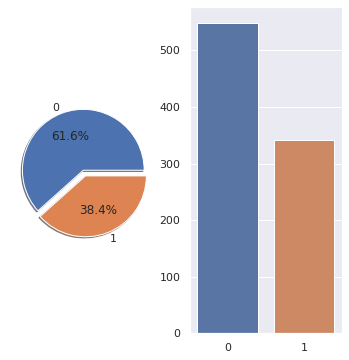

In [75]:
f,ax=plt.subplots(1,2,figsize=(6,6))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%0.1f%%',ax=ax[0],shadow=True)
ax[0].set_ylabel('')
sns.countplot(x = data["Survived"] , ax = ax[1])
ax[1].set_ylabel('')
ax[1].set_xlabel('')
plt.show()

We can see that 38.4% of the passengers survived.

**Discovering features and their correlation with survived**

In [76]:
def survived_bar_plot(feature):
    plt.figure(figsize = (6,6))
    sns.barplot(data = data , x = feature , y = "Survived").set_title(f"{feature} Vs Survived")
    plt.show()

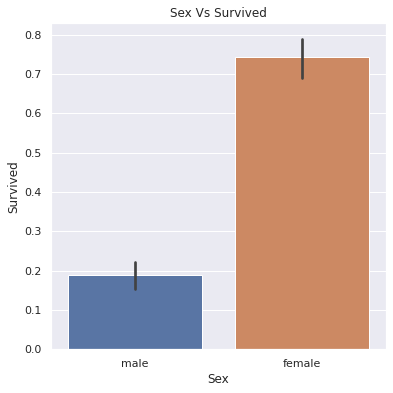

In [77]:
survived_bar_plot('Sex')

Females have a higher survival rate of 74%

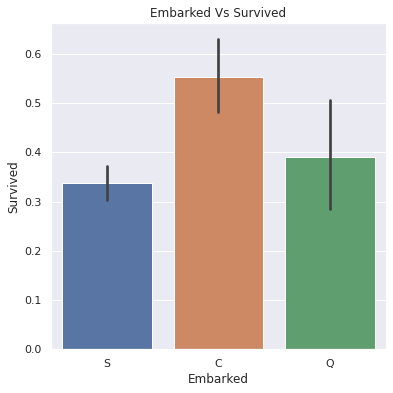

In [78]:
survived_bar_plot('Embarked')

Passengers with C embarked are most likely to survive 

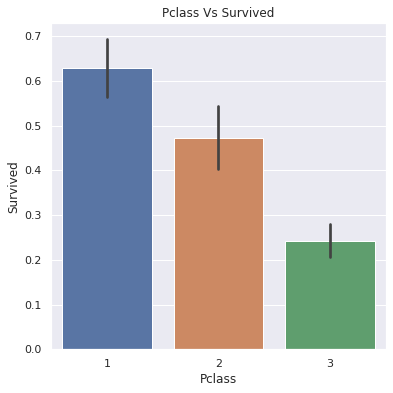

In [79]:
survived_bar_plot('Pclass')

Pclass 1 passengers are most likely to survive

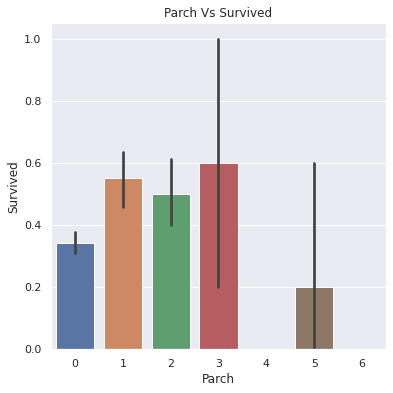

In [80]:
survived_bar_plot('Parch')

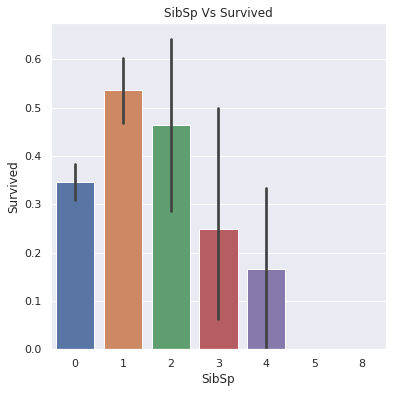

In [81]:
survived_bar_plot('SibSp')

Sibs and Parch has zero correlations for some values, which needs to be looked into.

In [82]:
def survived_hist_plot(feature):
    plt.figure(figsize = (6,6))
    sns.histplot(data = data , x = feature , hue = "Survived",palette = sns.color_palette(["orange" , "blue"]) ,
                 multiple = "stack" ).set_title(f"{feature} Vs Survived")
    plt.show()
    
    

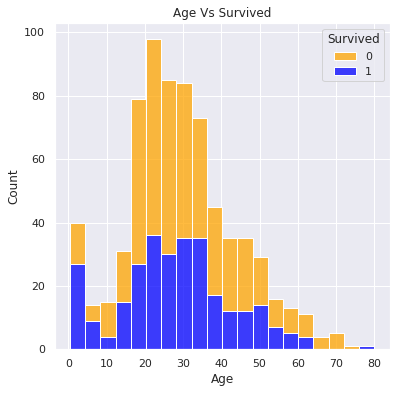

In [83]:
survived_hist_plot("Age")



*   Majority of the passengers are between 20-40 years
*   Children <=10 and elderly passengers >75 are more likely to survive.



### **Data Wrangling**

In [84]:
# dropping columns

data.drop(columns = ["Ticket" , "Cabin", "PassengerId", "Name"] , inplace = True)

In [85]:
#filling missing values

data["Age"].fillna(data["Age"].median(),inplace = True)
data["Embarked"].fillna("S",inplace = True)
data['Age'] = data['Age'].astype(int)

In [86]:
data['Fare'] = data['Fare'].astype(int)

In [87]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

##### **Converting categorical features to numerical features**

In [88]:
data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} ).astype(int) 
data['Embarked'] = data['Embarked'].map( {'C': 0, 'Q': 1, 'S': 2} ).astype(int)     

In [89]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int64
 3   Age       891 non-null    int64
 4   SibSp     891 non-null    int64
 5   Parch     891 non-null    int64
 6   Fare      891 non-null    int64
 7   Embarked  891 non-null    int64
dtypes: int64(8)
memory usage: 55.8 KB


##### **Feature Engineering**

In [90]:
# Creating a new column , FamilySize, from Sibps and Parch

data['FamilySize'] = data['SibSp'] + data['Parch'] 

data.drop(['Parch', 'SibSp'], axis=1 , inplace = True)
  


##### **SPLITTING**

In [94]:
# Extract X and y
X = data.drop("Survived",axis=1)
y = data["Survived"]


In [97]:
# train and test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)